In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# these are my implementations (xgb.py and util.py)
import util
import xgb

----------------------------------
Cleaning the Data (World University Rankings)
----------------------------------
data obtained from kaggle: https://www.kaggle.com/mylesoneill/world-university-rankings

In [29]:
universities_df = util.read_data('cwurData.csv')
universities_df = util.mean_imputer(universities_df, 'broad_impact')
universities_df['country'] = util.enumerate_col(universities_df, 'country')
universities_df = universities_df.drop(['institution'], axis=1)

y = universities_df.iloc[:, :1] #y = df['world_rank']
X = universities_df.iloc[:, 1:]

universities_df
#df.isnull().sum()

,world_rank,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,55,1,7,9,1,1,1,1,496.6995,5,100,2012
1,2,55,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,3,55,3,17,11,5,4,2,2,496.6995,15,89.5,2012
3,4,58,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,5,55,4,2,29,7,37,22,22,496.6995,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,2,2,101,101,43,101,101,101,496.6995,101,44.5,2013
196,97,7,4,101,101,101,68,101,92,496.6995,81,44.5,2013
197,98,17,1,69,101,81,74,79,71,496.6995,101,44.39,2013
198,99,18,5,28,101,72,101,87,101,496.6995,101,44.36,2013


In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=440)

y_train = np.asarray(y_train, dtype = float)
y_train = np.concatenate(y_train)

y_test = np.asarray(y_test, dtype = float)
y_test = np.concatenate(y_test)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(140, 12) (60, 12) (140,) (60,)


----------------------------------
Ranking with XGBoost 
----------------------------------

     ~~~ TRAINING ~~~
ITERATION  0
Accuracy is: 5
RMS error is: 23.278847950548624
F1 score is: 0.02103825136612022
ITERATION  1
Accuracy is: 1
RMS error is: 21.733596258999714
F1 score is: 0.004310344827586207
ITERATION  2
Accuracy is: 1
RMS error is: 20.706375063104797
F1 score is: 0.003448275862068966
ITERATION  3
Accuracy is: 3
RMS error is: 19.571399606049706
F1 score is: 0.01488095238095238
ITERATION  4
Accuracy is: 1
RMS error is: 18.585281768450496
F1 score is: 0.0034782608695652175
ITERATION  5
Accuracy is: 2
RMS error is: 17.66756511641763
F1 score is: 0.009696969696969697
ITERATION  6
Accuracy is: 2
RMS error is: 17.051974702943976
F1 score is: 0.008181818181818182
ITERATION  7
Accuracy is: 5
RMS error is: 16.409685486863474
F1 score is: 0.030030030030030026
ITERATION  8
Accuracy is: 5
RMS error is: 16.018838116516896
F1 score is: 0.028273809523809517
ITERATION  9
Accuracy is: 6
RMS error is: 15.510109350468554
F1 score is: 0.03273809523809524
ITERATION  10
Accuracy is: 3
RM

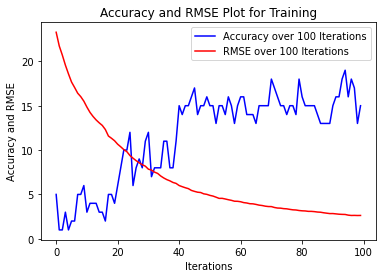


       ~~~ TESTING ~~~
Accuracy is: 1
RMS error is: 34.84130690239198
F1 score is: 0.006666666666666667


In [32]:
model = xgb.XGBoost()

print('     ~~~ TRAINING ~~~')
model.fit(X_train, y_train, iterations = 100, init_pred='linreg')

print('\n       ~~~ TESTING ~~~')
predictions = model.predict(X_test)
a,b = util.evaluate(y_test, predictions)

----------------------------------
Cleaning the Data (Video Game Sales)
----------------------------------
data obtained from kaggle: https://www.kaggle.com/gregorut/videogamesales

In [33]:
vgsales_df = util.read_data('vgsales.csv')

vgsales_df['Genre'] = util.enumerate_col(vgsales_df, 'Genre')

vgsales_df['Platform'] = util.enumerate_col(vgsales_df, 'Platform')

vgsales_df = vgsales_df.drop(['Name'], axis=1)
vgsales_df = vgsales_df.drop(['Publisher'], axis=1)

vgsales_df = util.mean_imputer(vgsales_df, 'Year')

y = vgsales_df.iloc[:, :1] #y = df['Rank']
X = vgsales_df.iloc[:, 1:]

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=650)

y_train = np.asarray(y_train, dtype = float)
y_train = np.concatenate(y_train)

y_test = np.asarray(y_test, dtype = float)
y_test = np.concatenate(y_test)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(140, 8) (60, 8) (140,) (60,)


----------------------------------
Ranking with XGBoost 
----------------------------------

     ~~~ TRAINING ~~~
ITERATION  0
Accuracy is: 2
RMS error is: 131.9179037634139
F1 score is: 0.0077777777777777776
ITERATION  1
Accuracy is: 2
RMS error is: 116.04548916504922
F1 score is: 0.007575757575757575
ITERATION  2
Accuracy is: 0
RMS error is: 104.46982552126927
F1 score is: 0.0
ITERATION  3
Accuracy is: 0
RMS error is: 96.04322770139281
F1 score is: 0.0
ITERATION  4
Accuracy is: 1
RMS error is: 90.07695122980763
F1 score is: 0.002366863905325444
ITERATION  5
Accuracy is: 1
RMS error is: 85.75870542140638
F1 score is: 0.0024691358024691358
ITERATION  6
Accuracy is: 2
RMS error is: 82.76026766970915
F1 score is: 0.008771929824561403
ITERATION  7
Accuracy is: 2
RMS error is: 80.18154005180597
F1 score is: 0.006822612085769979
ITERATION  8
Accuracy is: 3
RMS error is: 78.21145533764057
F1 score is: 0.012745098039215686
ITERATION  9
Accuracy is: 1
RMS error is: 76.59681082506914
F1 score is: 0.004016064257028112
ITERATION  10
Accuracy is: 3
RMS error is: 73.46454711314624
F1 scor

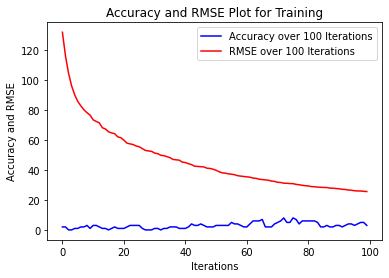


       ~~~ TESTING ~~~
Accuracy is: 0
RMS error is: 237.80937744336325
F1 score is: 0.0


In [35]:
model_vg = xgb.XGBoost()

print('     ~~~ TRAINING ~~~')
model_vg.fit(X_train, y_train, iterations = 100, init_pred='linreg')

print('\n       ~~~ TESTING ~~~')
predictions = model_vg.predict(X_test)
rmse = util.rank_rmse(y_test, predictions)
a,b = util.evaluate(y_test, predictions)